In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/Users/abbasali/Downloads/Data Science/dataset2.csv", sep=',')
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0  333497.0     Mechanical engineer  1968-03-19   
1     302.0  Sales professional, IT  1990-01-17   
2       NaN       Librarian, public  1970-10-21   
3       NaN            Set designer  1987-07-25   
4    1126.0      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [3]:
df.describe()

Unnamed: 0        cc_num          amt           zip          lat  \
count  2027.000000  2.027000e+03  1995.000000   1988.000000  2027.000000   
mean   1012.955599  4.274195e+17    64.944145  48950.855131    38.334855   
std     585.212609  1.328012e+18   150.965755  26659.804613     5.046541   
min       0.000000  6.041621e+10     1.010000   1257.000000    20.027100   
25%     506.500000  1.800655e+14     8.500000  27522.000000    34.339600   
50%    1013.000000  3.531130e+15    31.490000  48088.000000    39.047000   
75%    1519.500000  4.681601e+15    74.795000  72165.000000    41.838300   
max    2017.000000  4.992346e+18  3204.980000  99323.000000    48.887800   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  2027.000000  1.988000e+03  2.027000e+03  2027.000000  2027.000000   
mean    -89.979948  9.873717e+04  1.371838e+09    38.322081   -89.981290   
std      13.196906  3.296224e+05  1.231081e+04     5.074042    13.215409   
min    -155.369700  2.300000e+01  1.371817e+09    20.733607  -156.139388   
25%     -96.655050  8.247500e+02  1.371827e+09    34.393095   -96.734692   
50%     -87.349000  3.104000e+03  1.371837e+09    39.136084   -87.326088   
75%     -80.309950  2.702000e+04  1.371848e+09    41.912579   -80.324750   
max     -67.950300  2.906700e+06  1.371859e+09    49.681365   -67.254668   

          is_fraud  
count  2027.000000  
mean      0.004440  
std       0.066502  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [4]:
df[['trans_date_trans_time','cc_num']].value_counts()

trans_date_trans_time  cc_num             
2020-06-21 23:57:01    213141712584544        2
2020-06-21 23:56:46    2254799658404120       2
2020-06-21 23:56:41    4933461930348832       2
2020-06-21 23:56:20    4610064888664703       2
2020-06-21 23:56:15    2248348993063230       2
                                             ..
2020-06-21 16:00:17    4996263498048679       1
2020-06-21 15:59:52    2720433095629877       1
2020-06-21 15:59:32    3591919803438423       1
2020-06-21 15:58:58    3575789281659026       1
2020-06-21 23:57:08    4890424426862856940    1
Name: count, Length: 2018, dtype: int64

In [5]:
df[['first','gender']].value_counts()

first     gender
Jessica   F         39
Mary      F         32
David     M         31
Jennifer  F         30
Kenneth   M         28
                    ..
Dalton    M          1
Hailey    F          1
Ruth      F          1
Lance     M          1
Johnny    M          1
Name: count, Length: 309, dtype: int64

In [6]:
print(df.duplicated().sum())

9


In [7]:
print(df.isna().sum())

Unnamed: 0                0
trans_date_trans_time     0
cc_num                    0
merchant                  0
category                  0
amt                      32
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                      39
lat                       0
long                      0
city_pop                 39
job                       0
dob                       0
trans_num                 0
unix_time                 0
merch_lat                 0
merch_long                0
is_fraud                  0
dtype: int64


In [8]:
outliers_columns = ['amt', 'zip', 'city_pop' ]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2027 non-null   int64  
 1   trans_date_trans_time  2027 non-null   object 
 2   cc_num                 2027 non-null   int64  
 3   merchant               2027 non-null   object 
 4   category               2027 non-null   object 
 5   amt                    1995 non-null   float64
 6   first                  2027 non-null   object 
 7   last                   2027 non-null   object 
 8   gender                 2027 non-null   object 
 9   street                 2027 non-null   object 
 10  city                   2027 non-null   object 
 11  state                  2027 non-null   object 
 12  zip                    1988 non-null   float64
 13  lat                    2027 non-null   float64
 14  long                   2027 non-null   float64
 15  city

In [10]:
print(df.isna().sum())

Unnamed: 0                0
trans_date_trans_time     0
cc_num                    0
merchant                  0
category                  0
amt                      32
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                      39
lat                       0
long                      0
city_pop                 39
job                       0
dob                       0
trans_num                 0
unix_time                 0
merch_lat                 0
merch_long                0
is_fraud                  0
dtype: int64


In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
def detect_outliers(df, outlier_columns):
    # Initialize a list to store outlier summaries
    outlier_summary = []

    # Iterate over each specified column for outlier detection
    for column in outlier_columns:
        if column in df.columns:  # Check if the column exists in the DataFrame
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers and append summary information
            outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
            outlier_summary.append({
                'Column': column,
                'Number of Outliers': outlier_count
            })

    # Create and return a summary DataFrame
    return pd.DataFrame(outlier_summary)

# Specify the columns to check for outliers
outliers_columns = ['amt', 'zip', 'city_pop']

# Call the function to detect outliers in the specified columns
outliers_all_summary = detect_outliers(df, outliers_columns)

# Display the summary DataFrame
print("Outlier Summary:")
print(outliers_all_summary)

Outlier Summary:
     Column  Number of Outliers
0       amt                  95
1       zip                   0
2  city_pop                 357


In [14]:
def cap_outlier(df, outlier_columns):
    # Loop through only the specified columns
    for column in outlier_columns:
        if column in df.columns:  # Check if the column exists in the DataFrame
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap outliers using .loc
            df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Example usage with df and specific columns
outlier_columns = ['amt', 'zip', 'city_pop']
df3 = cap_outlier(df, outlier_columns)

In [15]:
def detect_outliers(df3, outlier_columns):
    outlier_summary = []

    # Iterate over the specified columns only
    for column in outlier_columns:
        if column in df3.columns:  # Check if the column exists in the DataFrame
            Q1 = df3[column].quantile(0.25)
            Q3 = df3[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = df3[(df3[column] < lower_bound) | (df3[column] > upper_bound)]
            
            # Append summary information
            outlier_summary.append({
                'Column': column,
                'Number of Outliers': len(outliers)
            })

    # Create a summary DataFrame
    outlier_summary_df = pd.DataFrame(outlier_summary)
    
    return outlier_summary_df

# Example usage
outlier_columns = ['amt', 'zip', 'city_pop']
outliers_all_summary = detect_outliers(df3, outlier_columns)

# Display the summary DataFrame
print("Outlier Summary:")
print(outliers_all_summary)


Outlier Summary:
     Column  Number of Outliers
0       amt                   0
1       zip                   0
2  city_pop                   0


In [16]:
df['is_fraud'] = df['is_fraud'].astype(int)
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
4           4   2020-06-21 12:15:17  3526826139003047   
7           7   2020-06-21 12:15:50  3589289942931264   
8           8   2020-06-21 12:16:10  3596357274378601   

                            merchant       category    amt   first      last  \
0              fraud_Kirlin and Sons  personal_care   2.86    Jeff   Elliott   
1               fraud_Sporer-Keebler  personal_care  29.84  Joanne  Williams   
4              fraud_Johnston-Casper         travel   3.19  Nathan    Massey   
7                  fraud_Reichel LLC  personal_care  10.37   Paula   Estrada   
8  fraud_Goyette, Howell and Collier   shopping_pos   4.37   David   Everett   

  gender                    street  ...      lat      long   city_pop  \
0      M         351 Darlene Green  ...  33.9659  -80.9355  65436.125   
1      F          3638 Marsh Union  ...  40.3207 -110.4360    302.000   
4      M  5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   1126.000   
7      F           350 Stacy Glens  ...  43.7557  -97.5936    343.000   
8      M           4138 David Fall  ...  41.0001  -78.2357   3688.000   

                                     job         dob  \
0                    Mechanical engineer  1968-03-19   
1                 Sales professional, IT  1990-01-17   
4                     Furniture designer  1955-07-06   
7  Development worker, international aid  1972-03-05   
8                          Advice worker  1973-05-27   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
7  8be473af4f05fc6146ea55ace73e7ca2  1371816950  44.495498  -97.728453   
8  71a1da150d1ce510193d7622e08e784e  1371816970  41.546067  -78.120238   

   is_fraud  
0         0  
1         0  
4         0  
7         0  
8         0  

[5 rows x 23 columns]

In [17]:
print("Statistics:")
print("=" * 50)

# Specify the columns for which you want to calculate statistics
stat_columns = ['amt', 'zip', 'city_pop']

# Loop through each specified numeric column and print statistics
for column in stat_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        # Calculate statistics
        min_value = df[column].min()
        max_value = df[column].max()
        mean_value = df[column].mean()
        median_value = df[column].median()
        mode_value = df[column].mode()[0] if not df[column].mode().empty else None
        
        # Print the statistics in a formatted manner
        print(f"{column}:")
        print(f"  {'Min:':<10} {min_value:>10}")
        print(f"  {'Max:':<10} {max_value:>10}")
        print(f"  {'Mean:':<10} {mean_value:>10.2f}")  # Format mean to 2 decimal places
        print(f"  {'Median:':<10} {median_value:>10}")
        print(f"  {'Mode:':<10} {mode_value:>10}")
        print("-" * 50)  # Separator for better readability


Statistics:
amt:
  Min:             1.01
  Max:          174.775
  Mean:           49.65
  Median:         31.96
  Mode:         174.775
--------------------------------------------------
zip:
  Min:           1257.0
  Max:          99323.0
  Mean:        48735.87
  Median:       47676.5
  Mode:          4287.0
--------------------------------------------------
city_pop:
  Min:             23.0
  Max:        65436.125
  Mean:        17421.25
  Median:        3104.0
  Mode:       65436.125
--------------------------------------------------


In [18]:
# Print variance of specified numeric columns
print("Variance of Numeric Columns:")
print("=" * 50)

# Specify the columns for which you want to calculate variance
var_columns = ['amt', 'zip', 'city_pop']

for column in var_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        print(f"{column:<25}: {df[column].var():>.2f}")

print("=" * 50)


Variance of Numeric Columns:
amt                      : 2491.43
zip                      : 708284071.24
city_pop                 : 625433762.76


In [19]:
# Print standard deviation of specified numeric columns
print("Standard Deviation of Numeric Columns:")
print("=" * 50)

# Specify the columns for which you want to calculate standard deviation
std_columns = ['amt', 'zip', 'city_pop']

for column in std_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        print(f"{column:<25}: {df[column].std():>.2f}")

print("=" * 50)


Standard Deviation of Numeric Columns:
amt                      : 49.91
zip                      : 26613.61
city_pop                 : 25008.67


In [20]:
import pandas as pd
import numpy as np

# Sample DataFrame for demonstration
data = {
    'amt': [100, 150, 300, 5000, 200],
    'zip': [12345, 12346, 12347, 12348, 12349],
    'city_pop': [1000, 1500, 3000, 50000, 2000],
    'is_fraud': [0, 1, 0, 1, 0]  # Target column, not included in MAD calculation
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print Mean Absolute Deviation of specified numeric columns
print("Mean Absolute Deviation of Numeric Columns:")
print("=" * 50)

# Specify the columns for which you want to calculate Mean Absolute Deviation
mad_columns = ['amt', 'zip', 'city_pop']

for column in mad_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        mad = np.mean(np.abs(df[column] - np.mean(df[column])))  # Calculate MAD
        print(f"{column:<25}: {mad:>.2f}")

print("=" * 50)


Mean Absolute Deviation of Numeric Columns:
amt                      : 1540.00
zip                      : 1.20
city_pop                 : 15400.00


In [21]:
print("Coefficient of Variation of Numeric Columns:")
print("=" * 50)

# Specify the columns for which you want to calculate the Coefficient of Variation
cv_columns = ['amt', 'zip', 'city_pop']

for column in cv_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        mean = np.mean(df[column])
        std_dev = np.std(df[column], ddof=0)  # Population standard deviation
        
        if mean != 0:  # Avoid division by zero
            cv = std_dev / mean  # No percentage conversion
        else:
            cv = np.nan  # Assign NaN if mean is zero
        
        print(f"{column:<25}: {cv:>.4f}")  # Format CV to 4 decimal places

print("=" * 50)

Coefficient of Variation of Numeric Columns:
amt                      : 1.6749
zip                      : 0.0001
city_pop                 : 1.6749


In [22]:
print("Interquartile Range of Numeric Columns:")
print("=" * 50)

# Specify the columns for which you want to calculate the Interquartile Range
iqr_columns = ['amt', 'zip', 'city_pop']

for column in iqr_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        q1 = np.percentile(df[column], 25)  # First quartile (25th percentile)
        q3 = np.percentile(df[column], 75)  # Third quartile (75th percentile)
        
        iqr = q3 - q1
        
        print(f"{column:<25}: {iqr:>.2f}")  # Format IQR to 2 decimal places

print("=" * 50)

Interquartile Range of Numeric Columns:
amt                      : 150.00
zip                      : 2.00
city_pop                 : 1500.00


In [23]:
df.head()

amt    zip  city_pop  is_fraud
0   100  12345      1000         0
1   150  12346      1500         1
2   300  12347      3000         0
3  5000  12348     50000         1
4   200  12349      2000         0

In [24]:
scaler = MinMaxScaler()

In [25]:
numerical_list = ['amt','zip','city_pop', 'is_fraud']

In [26]:
df[numerical_list] = scaler.fit_transform(df[numerical_list])
df[numerical_list].head()

amt   zip  city_pop  is_fraud
0  0.000000  0.00  0.000000       0.0
1  0.010204  0.25  0.010204       1.0
2  0.040816  0.50  0.040816       0.0
3  1.000000  0.75  1.000000       1.0
4  0.020408  1.00  0.020408       0.0

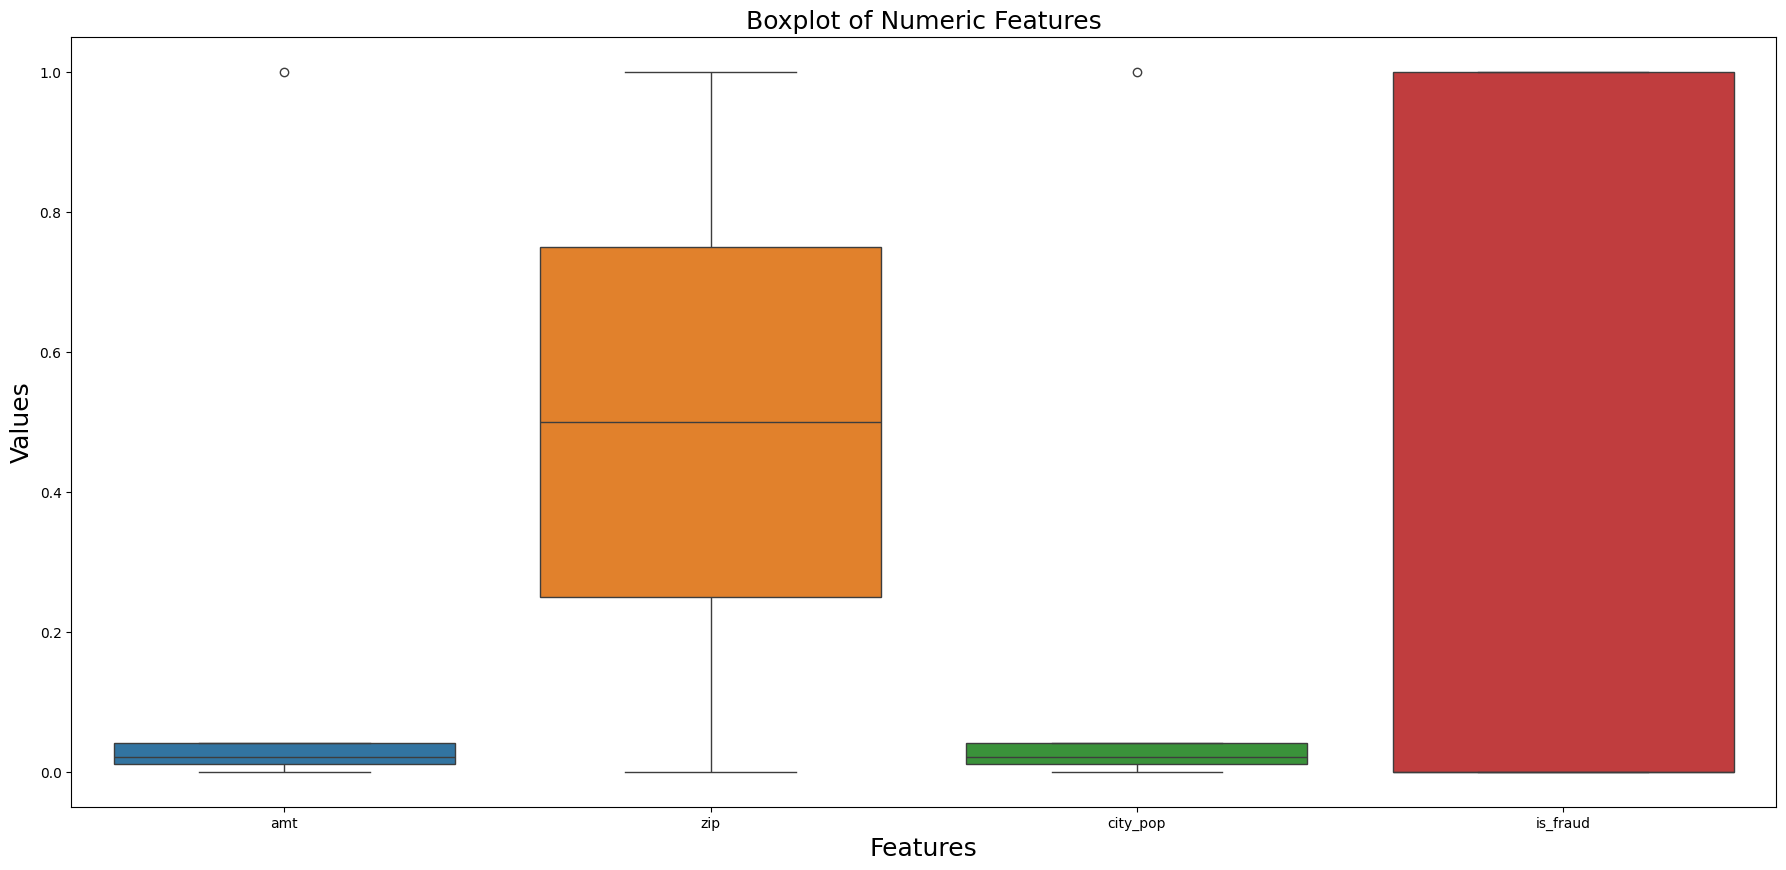

In [27]:
plt.figure(figsize=(22, 10))

# Specify the columns you want to include in the boxplot
cols_to_plot = ['amt', 'zip', 'city_pop','is_fraud']  # Include other numeric columns if necessary

# Create a boxplot for the specified columns in df
sns.boxplot(data=df[cols_to_plot])

# Set plot titles and labels
plt.title('Boxplot of Numeric Features', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Values', fontsize=18)

# Show the plot
plt.show()

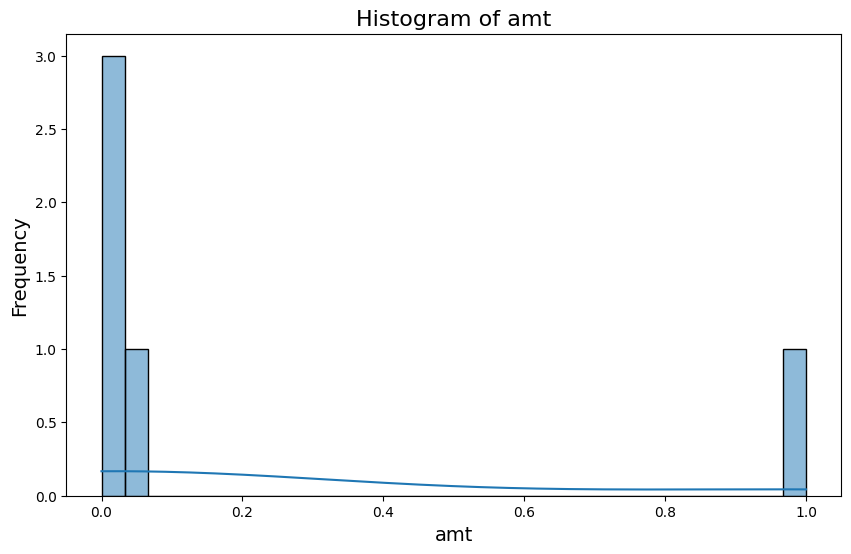

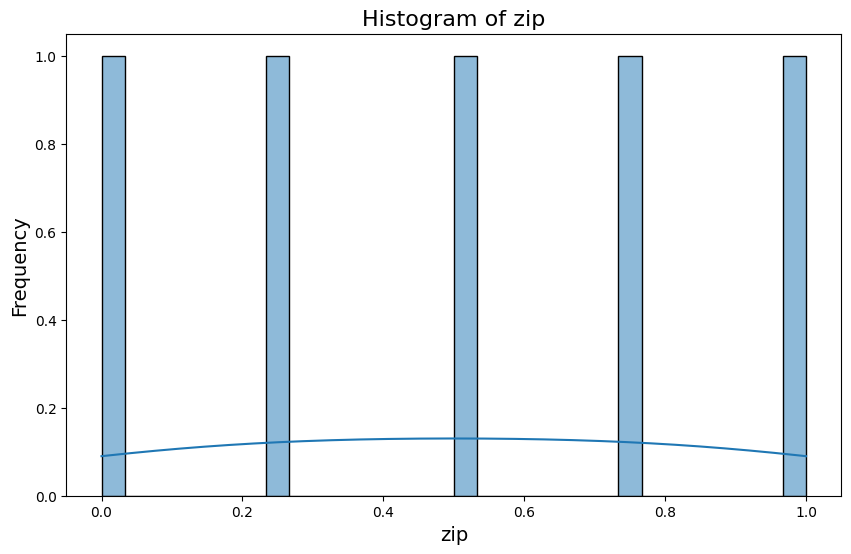

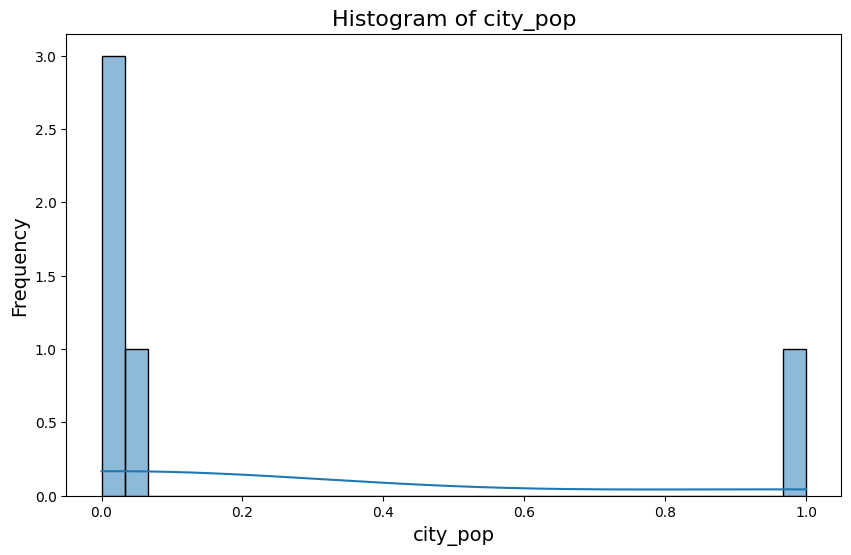

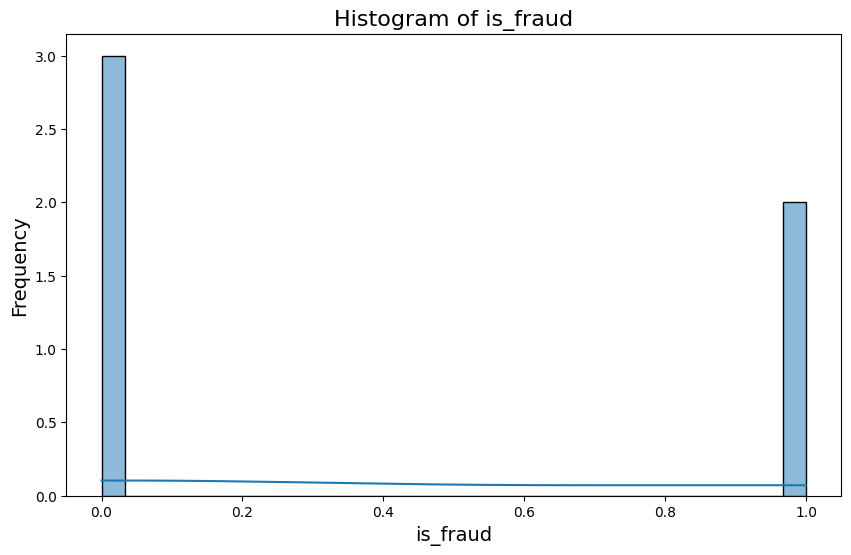

In [28]:
numerical_list = ['amt', 'zip', 'city_pop', 'is_fraud']

# Loop through each column in numerical_list
for col in numerical_list:
    plt.figure(figsize=(10, 6))  # Set figure size for each histogram
    sns.histplot(data=df[col], bins=30, kde=True)  # Create a histogram with KDE
    plt.title(f'Histogram of {col}', fontsize=16)  # Title for each histogram
    plt.xlabel(col, fontsize=14)  # X-axis label
    plt.ylabel('Frequency', fontsize=14)  # Y-axis label
    plt.show()  # Display the plot

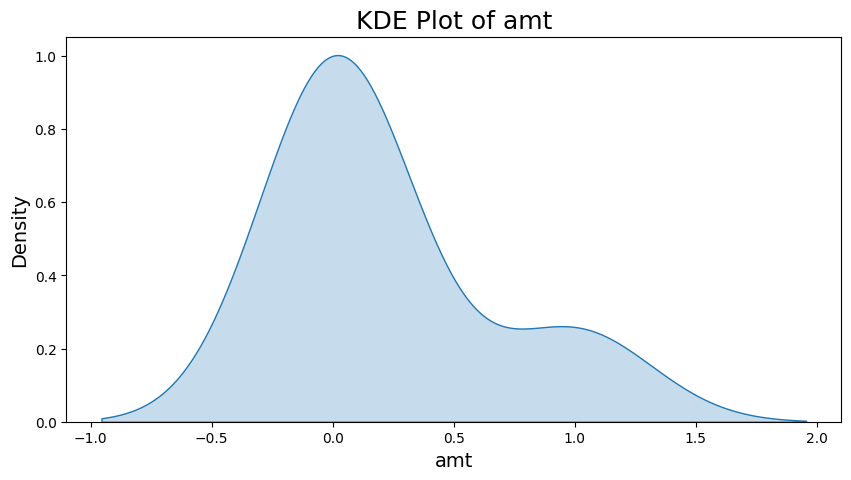

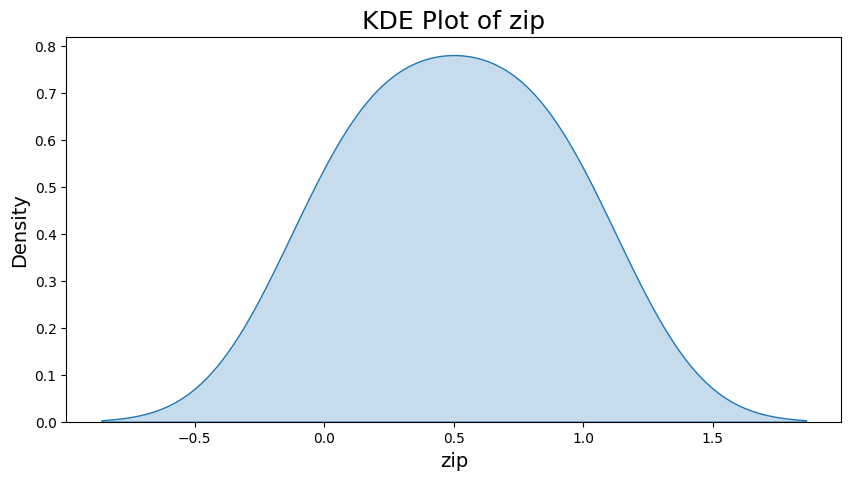

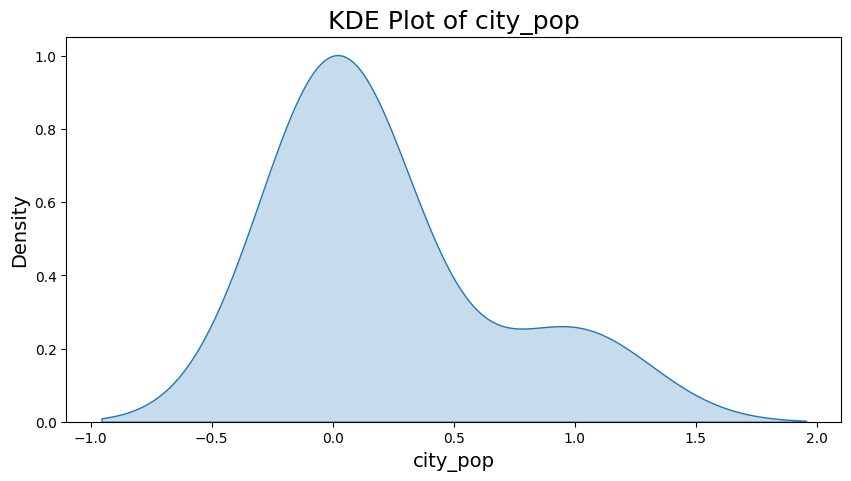

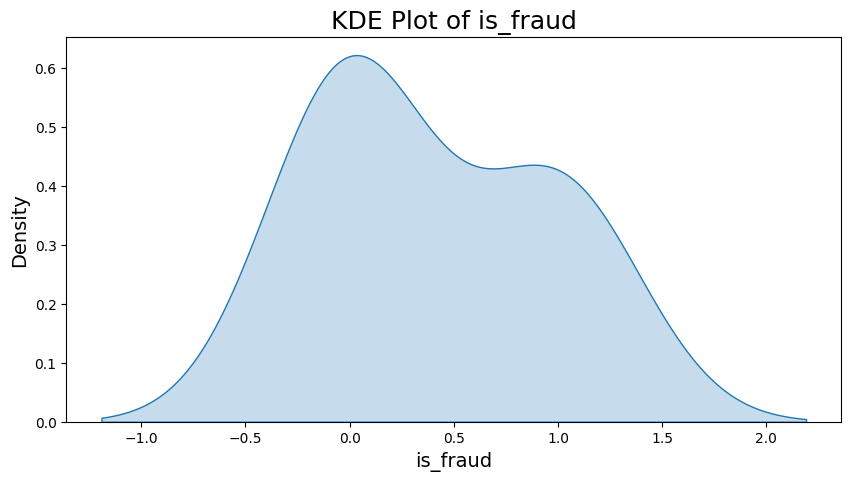

In [29]:
numerical_list = ['amt', 'zip', 'city_pop', 'is_fraud']

# Create KDE plots for the specified numeric columns in mdf
for column in numerical_list:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=column, fill=True)  # fill=True to fill the area under the curve
    plt.title(f'KDE Plot of {column}', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

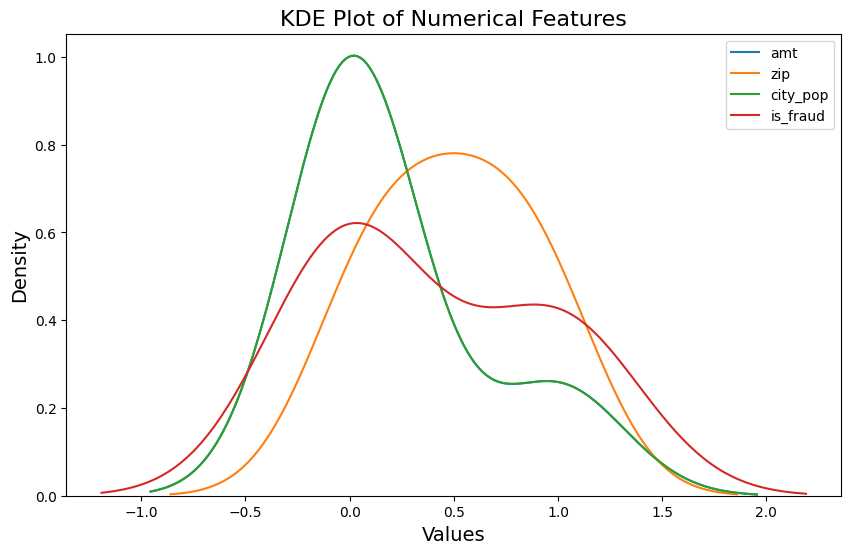

In [30]:
numerical_list = ['amt', 'zip', 'city_pop', 'is_fraud']

# Set figure size for the combined KDE plot
plt.figure(figsize=(10, 6))

# Loop through each column in numerical_list
for col in numerical_list:
    sns.kdeplot(data=df[col], label=col)  # Create a KDE plot without fill

# Add legend and labels
plt.legend()
plt.title('KDE Plot of Numerical Features', fontsize=16)  # Title for the plot
plt.xlabel('Values', fontsize=14)  # X-axis label
plt.ylabel('Density', fontsize=14)  # Y-axis label

# Show the combined plot
plt.show()

In [31]:
df = pd.read_csv("/Users/abbasali/Downloads/Data Science/dataset2.csv", sep=',')
print(df.columns.tolist())

['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [32]:
df1=df[['trans_date_trans_time', 'cc_num', 'merchant', 'category']]
df2=df[['trans_date_trans_time', 'gender', 'merchant', 'category']]

In [33]:
df2

trans_date_trans_time gender                               merchant  \
0      2020-06-21 12:14:25      M                  fraud_Kirlin and Sons   
1      2020-06-21 12:14:33      F                   fraud_Sporer-Keebler   
2      2020-06-21 12:14:53      F   fraud_Swaniawski, Nitzsche and Welch   
3      2020-06-21 12:15:15      M                      fraud_Haley Group   
4      2020-06-21 12:15:17      M                  fraud_Johnston-Casper   
...                    ...    ...                                    ...   
2022   2020-06-21 23:56:20      F                  fraud_Turner and Sons   
2023   2020-06-21 23:56:41      M               fraud_Romaguera and Sons   
2024   2020-06-21 23:56:46      F                 fraud_Fritsch and Sons   
2025   2020-06-21 23:57:01      F                      fraud_Cormier LLC   
2026   2020-06-21 23:57:08      M  fraud_Bahringer, Bergnaum and Quitzon   

            category  
0      personal_care  
1      personal_care  
2     health_fitness  
3           misc_pos  
4             travel  
...              ...  
2022    shopping_pos  
2023          travel  
2024  health_fitness  
2025    shopping_net  
2026            home  

[2027 rows x 4 columns]

In [34]:
merged_df = pd.merge(df1,df2, on='merchant', how='inner')
merged_df

trans_date_trans_time_x               cc_num  \
0         2020-06-21 12:14:25     2291163933867244   
1         2020-06-21 12:14:25     2291163933867244   
2         2020-06-21 12:14:33     3573030041201292   
3         2020-06-21 12:14:33     3573030041201292   
4         2020-06-21 12:14:33     3573030041201292   
...                       ...                  ...   
10844     2020-06-21 23:57:08  4890424426862856940   
10845     2020-06-21 23:57:08  4890424426862856940   
10846     2020-06-21 23:57:08  4890424426862856940   
10847     2020-06-21 23:57:08  4890424426862856940   
10848     2020-06-21 23:57:08  4890424426862856940   

                                    merchant     category_x  \
0                      fraud_Kirlin and Sons  personal_care   
1                      fraud_Kirlin and Sons  personal_care   
2                       fraud_Sporer-Keebler  personal_care   
3                       fraud_Sporer-Keebler  personal_care   
4                       fraud_Sporer-Keebler  personal_care   
...                                      ...            ...   
10844  fraud_Bahringer, Bergnaum and Quitzon           home   
10845  fraud_Bahringer, Bergnaum and Quitzon           home   
10846  fraud_Bahringer, Bergnaum and Quitzon           home   
10847  fraud_Bahringer, Bergnaum and Quitzon           home   
10848  fraud_Bahringer, Bergnaum and Quitzon           home   

      trans_date_trans_time_y gender     category_y  
0         2020-06-21 12:14:25      M  personal_care  
1         2020-06-21 18:31:23      M  personal_care  
2         2020-06-21 12:14:33      F  personal_care  
3         2020-06-21 12:54:55      F  personal_care  
4         2020-06-21 14:07:05      F  personal_care  
...                       ...    ...            ...  
10844     2020-06-21 19:52:32      F           home  
10845     2020-06-21 22:05:07      F           home  
10846     2020-06-21 22:13:20      F           home  
10847     2020-06-21 22:38:14      M           home  
10848     2020-06-21 23:57:08      M           home  

[10849 rows x 7 columns]

In [35]:
grouped_df = df.groupby('gender')
grouped_df

In [36]:
grouped_df_1 = df.groupby('gender').get_group('M')
grouped_df_1 = df.groupby('gender').get_group('F')
print(grouped_df_1)

      Unnamed: 0 trans_date_trans_time               cc_num  \
1              1   2020-06-21 12:14:33     3573030041201292   
2              2   2020-06-21 12:14:53     3598215285024754   
5              5   2020-06-21 12:15:37       30407675418785   
6              6   2020-06-21 12:15:44      213180742685905   
7              7   2020-06-21 12:15:50     3589289942931264   
...          ...                   ...                  ...   
2020        2011   2020-06-21 23:56:14  4210078554961359092   
2021        2012   2020-06-21 23:56:15     2248348993063230   
2022        2013   2020-06-21 23:56:20     4610064888664703   
2024        2015   2020-06-21 23:56:46     2254799658404120   
2025        2016   2020-06-21 23:57:01      213141712584544   

                                  merchant        category     amt     first  \
1                     fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2     fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
5  

In [37]:
concat_df_vertical = pd.concat([df1,df2],axis=0)
concat_df_vertical

trans_date_trans_time        cc_num  \
0      2020-06-21 12:14:25  2.291164e+15   
1      2020-06-21 12:14:33  3.573030e+15   
2      2020-06-21 12:14:53  3.598215e+15   
3      2020-06-21 12:15:15  3.591920e+15   
4      2020-06-21 12:15:17  3.526826e+15   
...                    ...           ...   
2022   2020-06-21 23:56:20           NaN   
2023   2020-06-21 23:56:41           NaN   
2024   2020-06-21 23:56:46           NaN   
2025   2020-06-21 23:57:01           NaN   
2026   2020-06-21 23:57:08           NaN   

                                   merchant        category gender  
0                     fraud_Kirlin and Sons   personal_care    NaN  
1                      fraud_Sporer-Keebler   personal_care    NaN  
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness    NaN  
3                         fraud_Haley Group        misc_pos    NaN  
4                     fraud_Johnston-Casper          travel    NaN  
...                                     ...             ...    ...  
2022                  fraud_Turner and Sons    shopping_pos      F  
2023               fraud_Romaguera and Sons          travel      M  
2024                 fraud_Fritsch and Sons  health_fitness      F  
2025                      fraud_Cormier LLC    shopping_net      F  
2026  fraud_Bahringer, Bergnaum and Quitzon            home      M  

[4054 rows x 5 columns]

In [38]:
summary_stats = df.describe()
summary_stats

Unnamed: 0        cc_num          amt           zip          lat  \
count  2027.000000  2.027000e+03  1995.000000   1988.000000  2027.000000   
mean   1012.955599  4.274195e+17    64.944145  48950.855131    38.334855   
std     585.212609  1.328012e+18   150.965755  26659.804613     5.046541   
min       0.000000  6.041621e+10     1.010000   1257.000000    20.027100   
25%     506.500000  1.800655e+14     8.500000  27522.000000    34.339600   
50%    1013.000000  3.531130e+15    31.490000  48088.000000    39.047000   
75%    1519.500000  4.681601e+15    74.795000  72165.000000    41.838300   
max    2017.000000  4.992346e+18  3204.980000  99323.000000    48.887800   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  2027.000000  1.988000e+03  2.027000e+03  2027.000000  2027.000000   
mean    -89.979948  9.873717e+04  1.371838e+09    38.322081   -89.981290   
std      13.196906  3.296224e+05  1.231081e+04     5.074042    13.215409   
min    -155.369700  2.300000e+01  1.371817e+09    20.733607  -156.139388   
25%     -96.655050  8.247500e+02  1.371827e+09    34.393095   -96.734692   
50%     -87.349000  3.104000e+03  1.371837e+09    39.136084   -87.326088   
75%     -80.309950  2.702000e+04  1.371848e+09    41.912579   -80.324750   
max     -67.950300  2.906700e+06  1.371859e+09    49.681365   -67.254668   

          is_fraud  
count  2027.000000  
mean      0.004440  
std       0.066502  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [39]:
missing_values = df.isnull().sum()

In [40]:
correlation_matrix = df.select_dtypes(include=['float64','int64']).corr()

In [41]:
numeric_df = df.select_dtypes(include=['float64','int64'])

In [42]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Correcting the condition by fixing the broken line
outliers = numeric_df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [43]:
print("Summary Statistics :\n",summary_stats)
print("*"*70)
print("Missing Values :\n",missing_values)
print("*"*70)
print("Outliers :\n",outliers)
print("*"*70)

Summary Statistics :
         Unnamed: 0        cc_num          amt           zip          lat  \
count  2027.000000  2.027000e+03  1995.000000   1988.000000  2027.000000   
mean   1012.955599  4.274195e+17    64.944145  48950.855131    38.334855   
std     585.212609  1.328012e+18   150.965755  26659.804613     5.046541   
min       0.000000  6.041621e+10     1.010000   1257.000000    20.027100   
25%     506.500000  1.800655e+14     8.500000  27522.000000    34.339600   
50%    1013.000000  3.531130e+15    31.490000  48088.000000    39.047000   
75%    1519.500000  4.681601e+15    74.795000  72165.000000    41.838300   
max    2017.000000  4.992346e+18  3204.980000  99323.000000    48.887800   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  2027.000000  1.988000e+03  2.027000e+03  2027.000000  2027.000000   
mean    -89.979948  9.873717e+04  1.371838e+09    38.322081   -89.981290   
std      13.196906  3.296224e+05  1.231081e+04     5.074042    13

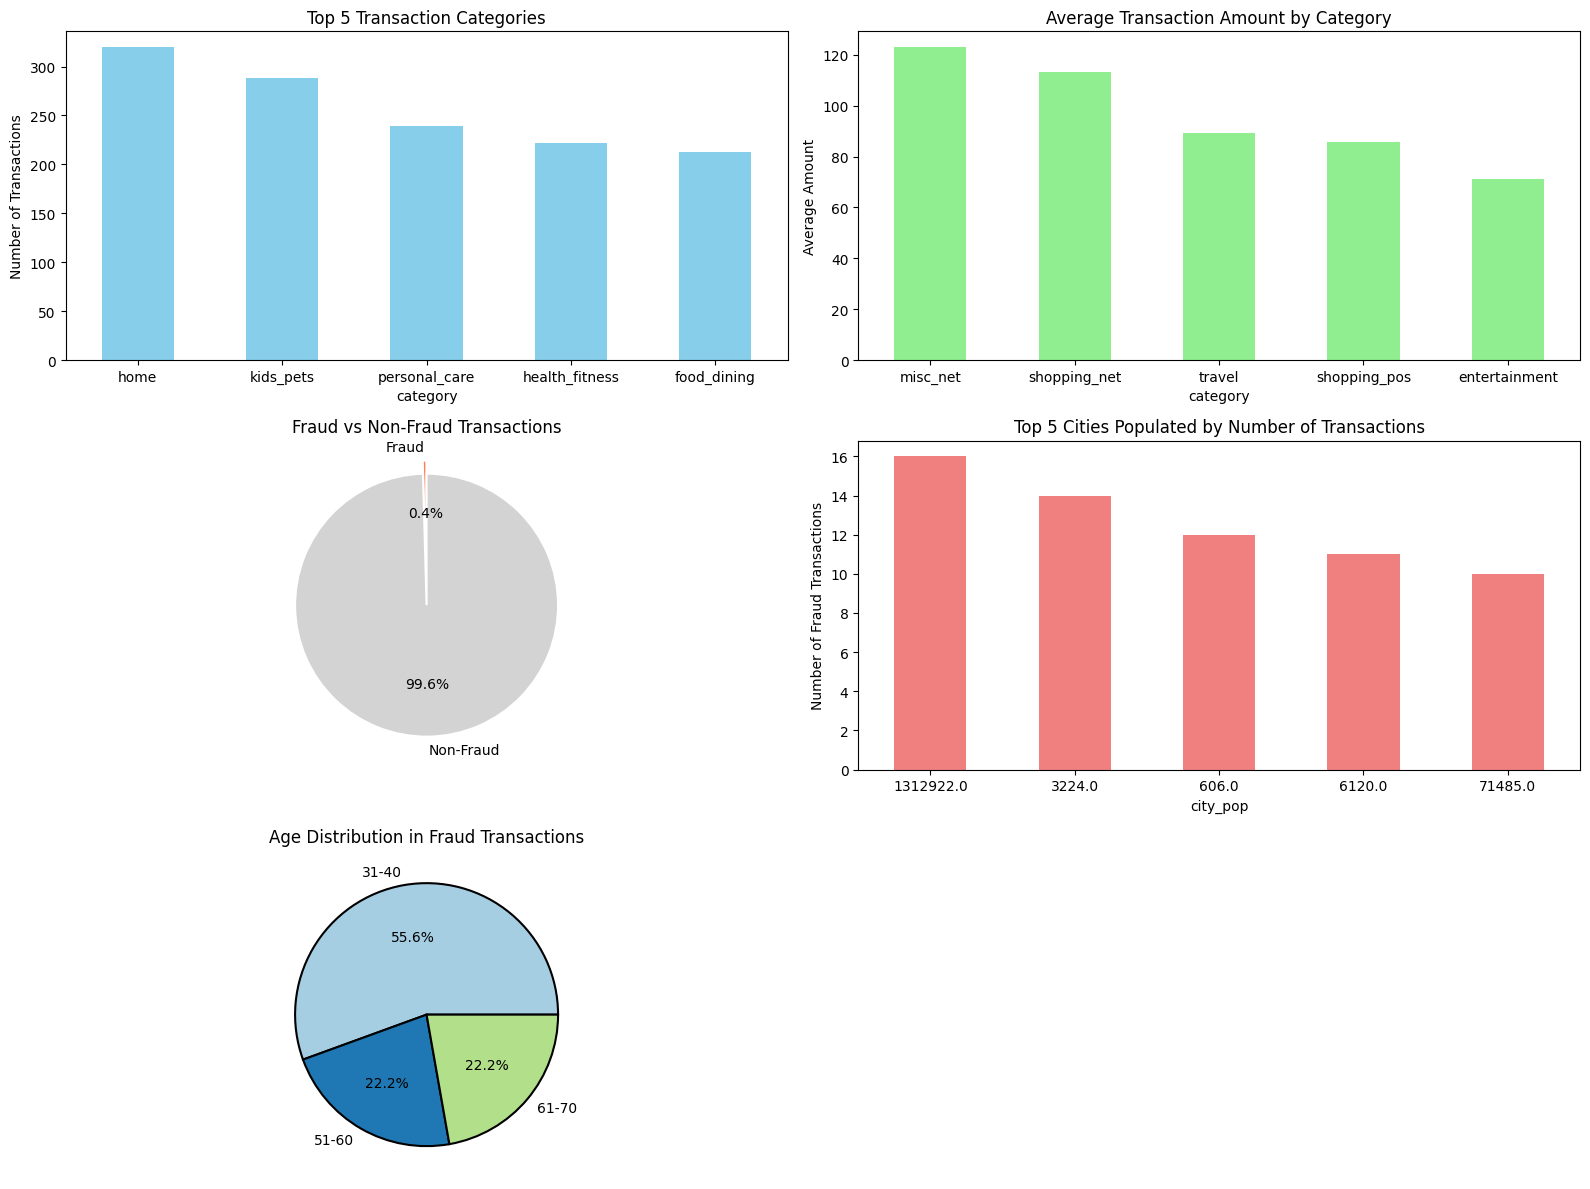


### Summary Report

**1. Top 5 Categories of Transactions:**
   - Home: 320
   - Kids & Pets: 288
   - Personal Care: 239
   - Health & Fitness: 222
   - Food & Dining: 213

**2. Average Amount per Category:**
   - Miscellaneous : $123.11
   - Shopping : $113.37
   - Travel: $89.29
   - Shopping (POS): $85.92
   - Entertainment: $71.34

**3. Total Fraud Transactions:**
   - Total Fraud Transactions: 9

**4. Top 5 Cities by Number of Transactions:**
   - City 1 (Pop: 1312922.0): 16 Transactions
   - City 2 (Pop: 3224.0): 14 Transactions
   - City 3 (Pop: 606.0): 12 Transactions
   - City 4 (Pop: 6120.0): 11 Transactions
   - City 5 (Pop: 71485.0): 10 Transactions

**5. Average Age in Fraud Transactions:**
   - Average Age: 44.44 years

**6. Age Distribution in Fraud Transactions:**
   - Age Group 31-40: 5 Transactions
   - Age Group 51-60: 2 Transactions
   - Age Group 61-70: 2 Transactions



In [44]:
# 1. Top 5 categories of transactions
top_categories = df['category'].value_counts().head(5)

# 2. Average transaction amount per category
avg_amt_per_category = df.groupby('category')['amt'].mean().sort_values(ascending=False).head(5)

# 3. Total number of fraud transactions
total_fraud_transactions = df['is_fraud'].sum()  # Total number of fraud transactions
non_fraud_transactions = df.shape[0] - total_fraud_transactions  # Non-fraud transactions

# 4. Top 5 cities with the highest number of transactions
top_cities = df['city_pop'].value_counts().head(5)

# 5. Average age of customers involved in fraud transactions
df['age'] = 2024 - pd.to_datetime(df['dob']).dt.year  # Assuming the current year is 2024
avg_age_fraud = df[df['is_fraud'] == 1]['age'].mean()  # Average age of fraud cases

# Grouping ages of fraud customers into ranges (e.g., 0-20, 21-30, etc.)
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df[df['is_fraud'] == 1]['age'], bins=age_bins, labels=age_labels, right=False)

# Counting the number of fraud transactions in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Remove age groups with 0 fraud transactions
age_group_counts = age_group_counts[age_group_counts > 0]

# Plotting the graphs
plt.figure(figsize=(16, 12))

# Plot 1: Top 5 Categories
plt.subplot(3, 2, 1)
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Transaction Categories')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

# Plot 2: Average Amount per Category
plt.subplot(3, 2, 2)
avg_amt_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Amount by Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=0)

# Plot 3: Total Fraud Transactions (Pie Chart)
plt.subplot(3, 2, 3)
plt.pie(
    [total_fraud_transactions, non_fraud_transactions], 
    labels=['Fraud', 'Non-Fraud'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['coral', 'lightgray'],
    explode=(0.1, 0),  # Exploding the Fraud slice
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}  # Thicker edge for better visibility
)
plt.title('Fraud vs Non-Fraud Transactions')

# Plot 4: Top 5 Cities by Transactions
plt.subplot(3, 2, 4)
top_cities.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Cities Populated by Number of Transactions')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)

# Plot 5: Age Distribution of Customers in Fraud Transactions (Pie Chart)
plt.subplot(3, 2, 5)
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired.colors,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'}  # Thicker edge for better visibility
)
plt.title('Age Distribution in Fraud Transactions')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# Creating a structured summary report
summary_report = f"""
### Summary Report

**1. Top 5 Categories of Transactions:**
   - Home: {top_categories['home']}
   - Kids & Pets: {top_categories['kids_pets']}
   - Personal Care: {top_categories['personal_care']}
   - Health & Fitness: {top_categories['health_fitness']}
   - Food & Dining: {top_categories['food_dining']}

**2. Average Amount per Category:**
   - Miscellaneous : ${avg_amt_per_category['misc_net']:.2f}
   - Shopping : ${avg_amt_per_category['shopping_net']:.2f}
   - Travel: ${avg_amt_per_category['travel']:.2f}
   - Shopping (POS): ${avg_amt_per_category['shopping_pos']:.2f}
   - Entertainment: ${avg_amt_per_category['entertainment']:.2f}

**3. Total Fraud Transactions:**
   - Total Fraud Transactions: {total_fraud_transactions}

**4. Top 5 Cities by Number of Transactions:**
   - City 1 (Pop: {top_cities.index[0]}): {top_cities.values[0]} Transactions
   - City 2 (Pop: {top_cities.index[1]}): {top_cities.values[1]} Transactions
   - City 3 (Pop: {top_cities.index[2]}): {top_cities.values[2]} Transactions
   - City 4 (Pop: {top_cities.index[3]}): {top_cities.values[3]} Transactions
   - City 5 (Pop: {top_cities.index[4]}): {top_cities.values[4]} Transactions

**5. Average Age in Fraud Transactions:**
   - Average Age: {avg_age_fraud:.2f} years

**6. Age Distribution in Fraud Transactions:**
   - Age Group 31-40: {age_group_counts.get('31-40', 0)} Transactions
   - Age Group 51-60: {age_group_counts.get('51-60', 0)} Transactions
   - Age Group 61-70: {age_group_counts.get('61-70', 0)} Transactions
"""

print(summary_report)


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/Users/abbasali/Downloads/Data Science/dataset2.csv", sep=',')

# Plot histogram for transaction amounts
plt.figure(figsize=(8, 5))
plt.hist(df['trans_amount'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

KeyError: 'trans_amount'

<Figure size 800x500 with 0 Axes>